In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Sangetha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_excel("Influencer.xlsx")
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915h,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865h,0.003,82.6k,167.2m,Brazil


In [3]:
df.dtypes

Rank                     int64
Channel Info            object
Influence Score          int64
Followers               object
Avg. Likes              object
Posts                   object
60-Day Eng Rate        float64
New Post Avg. Likes     object
Total Likes             object
Country Or Region       object
dtype: object

In [4]:
df.isnull().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

In [5]:
df.rename(columns = {'Channel Info':'Channel_Info','Avg. Likes': 'Avg_Likes','60-Day Eng Rate':'60-Day_EngRate',
                         'New Post Avg. Likes': 'NewPost_AvgLikes', 'Total Likes': 'Total_Likes','Country Or Region': 'Country'}, inplace = True)


In [6]:
df['Country'].unique()

array(['Spain', 'United States', nan, 'Canada', 'Brazil', 'Netherlands',
       'United Kingdom', 'India', 'Uruguay', 'Turkey', 'Indonesia',
       'Colombia', 'France', 'Australia', 'Italy', 'United Arab Emirates',
       'Puerto Rico', "CÃ´te d'Ivoire", 'Anguilla', 'Switzerland',
       'Sweden', 'British Virgin Islands', 'Czech Republic', 'Mexico',
       'Germany', 'Russia'], dtype=object)

In [7]:
df.groupby('Country')['Channel_Info'].nunique()

Country
Anguilla                   1
Australia                  1
Brazil                    13
British Virgin Islands     1
Canada                     3
Colombia                   3
Czech Republic             1
CÃ´te d'Ivoire             1
France                     6
Germany                    1
India                     12
Indonesia                  7
Italy                      1
Mexico                     2
Netherlands                2
Puerto Rico                1
Russia                     1
Spain                      5
Sweden                     1
Switzerland                1
Turkey                     2
United Arab Emirates       1
United Kingdom             4
United States             65
Uruguay                    1
Name: Channel_Info, dtype: int64

In [8]:
df.loc[df.Country.isnull()]

,Rank,Channel_Info,Influence Score,Followers,Avg_Likes,Posts,60-Day_EngRate,NewPost_AvgLikes,Total_Likes,Country
2,3,\nleomessi,90,363.9m,6.7m,915h,0.010,3.5m,6.1b,NaN
15,16,\nvirat.kohli,87,215.9m,3.5m,1.4k,0.013,2.7m,5.0b,NaN
18,19,\nmileycyrus,89,183.6m,1.3m,1.2k,0.004,702.4k,1.6b,NaN
20,21,\nkatyperry,92,173.3m,714.8k,2.1k,0.002,302.9k,1.5b,NaN
26,27,\nkingjames,86,133.7m,2.1m,2.4k,0.008,1.0m,4.9b,NaN
...,...,...,...,...,...,...,...,...,...,...
181,182,\ntoni.krs,83,35.6m,597.8k,946h,0.012,432.5k,565.5m,NaN
182,183,\nlunamaya,83,35.4m,145.4k,4.1k,0.002,58.6k,594.0m,NaN
185,186,\npaollaoliveirareal,84,34.9m,352.0k,4.7k,0.004,132.9k,1.6b,NaN
189,190,\nadidasoriginals,83,34.1m,136.2k,180h,0.002,66.8k,24.5m,NaN


The range of values in columns Followers, Avg_Likes	Posts, NewPost_AvgLikes, Total_Likes are different. Need to change it to same range.

In [9]:
followers=list(df['Followers'])
followers1=list()
for num in followers:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        followers1.append(new_num)
    else:
        followers1.append(float(num))
df['Followers']=followers1

In [10]:
avg_likes=list(df['Avg_Likes'])
avg_likes1=list()
for num in avg_likes:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        avg_likes1.append(new_num)
    else:
        new_num=1000*float(num.replace('k',''))
        avg_likes1.append(new_num)
df['Avg_Likes']=avg_likes1

In [11]:
post=list(df['Posts'])
post1=list()

for num in post:
    if 'k' in num:
        new_num=1000*float(num.replace('k',''))
        post1.append(new_num)
    if 'h' in num:
        new_num=1*float(num.replace('h',''))
        post1.append(new_num)
df['Posts']=post1

In [12]:
new_post_avg_like=list(df['NewPost_AvgLikes'])  
new_post_avg_like1=list()
for num in new_post_avg_like:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        new_post_avg_like1.append(new_num)
    else:
       new_num=1000*float(num.replace('k',''))
       new_post_avg_like1.append(new_num)
df['NewPost_AvgLikes']=new_post_avg_like1

In [13]:
total_likes=list(df['Total_Likes']) 
total_likes1=list()
for num in total_likes:
    if 'b' in num:
        new_num=1000000000*float(num.replace('b',''))
        total_likes1.append(new_num)
    else:
        new_num=1000000*float(num.replace('m',''))
        total_likes1.append(new_num)
df['Total_Likes']=total_likes1

In [14]:
df

,Rank,Channel_Info,Influence Score,Followers,Avg_Likes,Posts,60-Day_EngRate,NewPost_AvgLikes,Total_Likes,Country
0,1,\ncristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,3,\nleomessi,90,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09,NaN
3,4,\nselenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
4,5,\ntherock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33600000.0,680600.0,4600.0,0.009,305700.0,3.100000e+09,Russia
196,197,\ndanbilzerian,84,33600000.0,2200000.0,1400.0,0.064,2100000.0,3.000000e+09,Canada
197,198,\nraisa6690,80,33600000.0,227800.0,4200.0,0.003,103200.0,9.559000e+08,Indonesia
198,199,\nluansantana,79,33500000.0,193300.0,865.0,0.003,82600.0,1.672000e+08,Brazil


In [15]:
df.dtypes

Rank                  int64
Channel_Info         object
Influence Score       int64
Followers           float64
Avg_Likes           float64
Posts               float64
60-Day_EngRate      float64
NewPost_AvgLikes    float64
Total_Likes         float64
Country              object
dtype: object

#### 1. Correlation

In [16]:
df.corr()

C:\Users\Sangetha\AppData\Local\Temp\ipykernel_9976\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rank,Influence Score,Followers,Avg_Likes,Posts,60-Day_EngRate,NewPost_AvgLikes,Total_Likes
Rank,1.000000,-0.354843,-0.698193,-0.277699,-0.058132,0.028900,-0.272323,-0.465119
Influence Score,-0.354843,1.000000,0.365428,0.048502,0.168287,-0.072460,0.040011,0.234987
Followers,-0.698193,0.365428,1.000000,0.346829,0.069171,-0.107439,0.260764,0.667546
Avg_Likes,-0.277699,0.048502,0.346829,1.000000,-0.348795,0.789359,0.892784,0.361296
Posts,-0.058132,0.168287,0.069171,-0.348795,1.000000,-0.334047,-0.285154,0.232038
60-Day_EngRate,0.028900,-0.072460,-0.107439,0.789359,-0.334047,1.000000,0.866293,-0.001560
NewPost_AvgLikes,-0.272323,0.040011,0.260764,0.892784,-0.285154,0.866293,1.000000,0.351335
Total_Likes,-0.465119,0.234987,0.667546,0.361296,0.232038,-0.001560,0.351335,1.000000


C:\Users\Sangetha\AppData\Local\Temp\ipykernel_9976\3160324439.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


<AxesSubplot:>

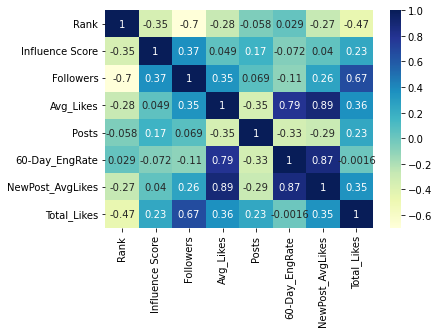

In [17]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

###### Highly Correlation exists between:

1. Rank and influence score
2. Rank and posts
3. Rank and Followers
4. Followers and Total likes
5. Avg likes and 60 day eng rate
6. Avg likes and new post avg likes
7. 60 day eng rate and new post avg likes

#### 2. Frequency Distribution

(array([  1.,   0.,   3.,   1.,   1.,   2.,   3.,  25., 107.,  57.]),
 array([22. , 29.1, 36.2, 43.3, 50.4, 57.5, 64.6, 71.7, 78.8, 85.9, 93. ]),
 <BarContainer object of 10 artists>)

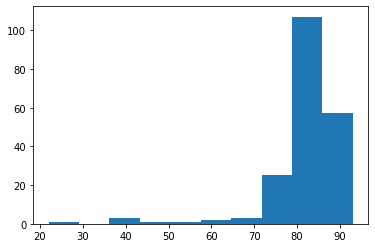

In [18]:
plt.hist(df['Influence Score'])

(array([161.,  10.,   8.,   5.,   6.,   3.,   4.,   2.,   0.,   1.]),
 array([3.3400e+07, 7.8580e+07, 1.2376e+08, 1.6894e+08, 2.1412e+08,
        2.5930e+08, 3.0448e+08, 3.4966e+08, 3.9484e+08, 4.4002e+08,
        4.8520e+08]),
 <BarContainer object of 10 artists>)

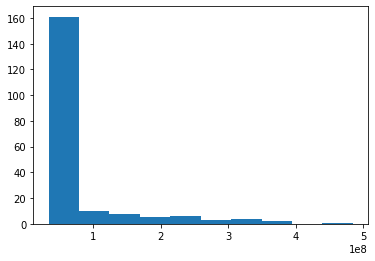

In [19]:
plt.hist(df['Followers'])

(array([84., 44., 22., 13., 11., 22.,  2.,  1.,  0.,  1.]),
 array([   20.,  1708.,  3396.,  5084.,  6772.,  8460., 10148., 11836.,
        13524., 15212., 16900.]),
 <BarContainer object of 10 artists>)

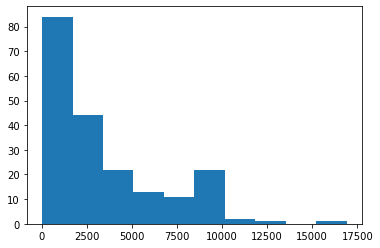

In [20]:
plt.hist(df['Posts'])

#### 3. Top Country

United States             65
Brazil                    13
India                     12
Indonesia                  7
France                     6
Spain                      5
United Kingdom             4
Colombia                   3
Canada                     3
Mexico                     2
Turkey                     2
Netherlands                2
Switzerland                1
Germany                    1
Czech Republic             1
British Virgin Islands     1
Sweden                     1
Australia                  1
Anguilla                   1
CÃ´te d'Ivoire             1
Puerto Rico                1
United Arab Emirates       1
Italy                      1
Uruguay                    1
Russia                     1
Name: Country, dtype: int64


<AxesSubplot:>

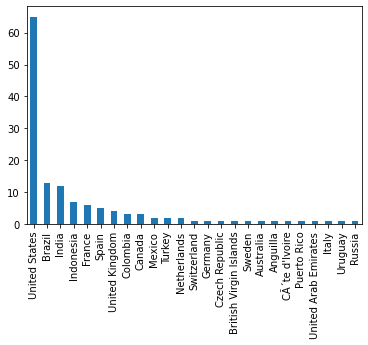

In [67]:
Highest = df['Country'].value_counts()
print(Highest)
Highest.plot.bar()

#### 4. Top 10 Influencers

<AxesSubplot:title={'center':'Top 10 - Highest followers'}, xlabel='Followers', ylabel='Channel_Info'>

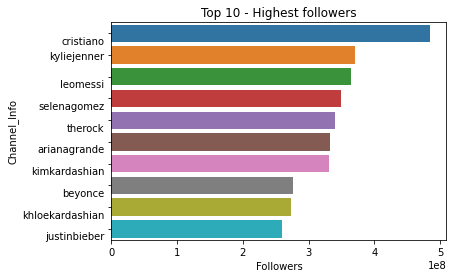

In [21]:
plt.title('Top 10 - Highest followers')
sns.barplot(y='Channel_Info',x='Followers', data=df.sort_values(by='Followers',ascending=False).head(10))

<AxesSubplot:title={'center':'Top 10 - Total Avg likes'}, xlabel='Avg_Likes', ylabel='Channel_Info'>

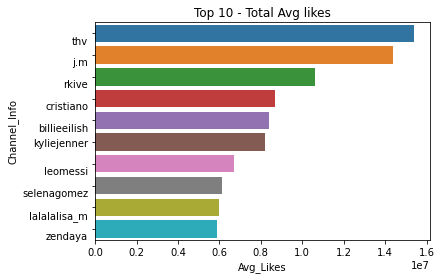

In [22]:
plt.title('Top 10 - Total Avg likes')
sns.barplot(y='Channel_Info',x='Avg_Likes',data=df.sort_values(by='Avg_Likes',ascending=False).head(10))

<AxesSubplot:title={'center':'Top 10 - Total likes'}, xlabel='Total_Likes', ylabel='Channel_Info'>

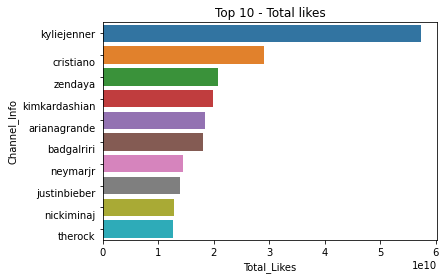

In [23]:
plt.title('Top 10 - Total likes')
sns.barplot(y='Channel_Info',x='Total_Likes', data=df.sort_values(by='Total_Likes',ascending=False).head(10))

#### 5. Relationship between Followers and Total Likes

In [24]:
df[['Followers', 'Total_Likes']].corr()   

,Followers,Total_Likes
Followers,1.000000,0.667546
Total_Likes,0.667546,1.000000


<AxesSubplot:title={'center':'Stacked Bar plot with Spectral Palette'}>

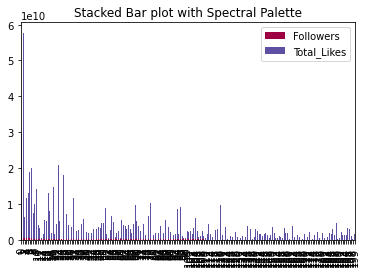

In [25]:
A = df[['Followers', 'Total_Likes']]
A.plot(kind='bar',stacked=True, colormap='Spectral', title='Stacked Bar plot with Spectral Palette')


<AxesSubplot:title={'center':'Stacked Bar plot with Spectral Palette'}>

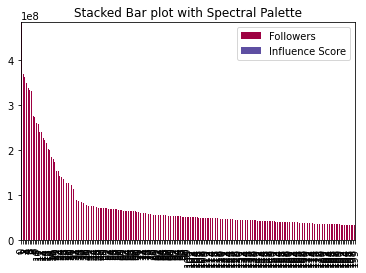

In [26]:
A = df[['Followers', 'Influence Score']]
A.plot(kind='bar',stacked=True, colormap='Spectral', title='Stacked Bar plot with Spectral Palette')

<AxesSubplot:title={'center':'Stacked Bar plot with Spectral Palette'}>

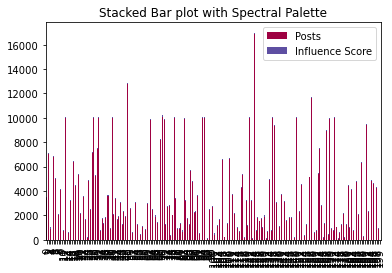

In [27]:
A = df[['Posts', 'Influence Score']]
A.plot(kind='bar',stacked=True, colormap='Spectral', title='Stacked Bar plot with Spectral Palette')

<AxesSubplot:title={'center':'Stacked Bar plot with Spectral Palette'}>

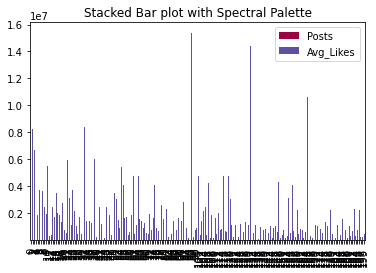

In [28]:
A = df[['Posts', 'Avg_Likes']]
A.plot(kind='bar',stacked=True, colormap='Spectral', title='Stacked Bar plot with Spectral Palette')